In [1]:
import torch
from torch import nn
from torch import Tensor

In [2]:
class MyLinear(nn.Module):
    def __init__(self, in_features, out_features, bias=True):
        super().__init__()
        self.in_features = in_features
        self.out_features = out_features

        self.weight = nn.Parameter(
                    torch.randn(in_features, out_features))
        self.bias = nn.Parameter(torch.randn(out_features))

    def forward(self, x:Tensor):
        return x @ self.weight + self.bias

In [4]:
x = torch.randn(5, 7)
x

tensor([[ 0.7664,  0.1487,  0.7633,  0.6314, -0.2902, -1.3493,  0.5618],
        [ 1.2599,  0.4448, -0.7408,  0.4431,  0.5050,  0.2594,  0.8828],
        [-0.6253,  0.3385,  2.2339,  1.0537,  1.4153,  0.6816, -0.6430],
        [ 0.4768, -0.2871, -0.1031, -0.4646,  0.6000, -1.9919,  0.1445],
        [-1.2941,  1.5700, -0.4338,  0.8450, -0.4592,  0.7633, -1.0159]])

In [7]:
layer = MyLinear(7, 12)
layer(x), layer(x).shape

(tensor([[-2.6730, -0.4883, -0.8662,  1.2500,  1.1965,  2.6134,  1.6878, -5.5266,
           1.2865, -0.5734,  1.4406, -1.7657],
         [ 1.2075, -3.1479,  1.8961, -1.8464, -0.6534,  1.3992, -3.4344, -1.0843,
          -1.6941,  0.8104, -0.0879, -0.2303],
         [-6.0833,  3.0199, -0.5279,  1.4100,  3.3463,  5.7961,  6.5281, -3.5461,
           2.4562, -0.7442,  1.5004,  0.4229],
         [ 0.8207,  0.6806,  0.5192, -1.5603,  2.0406,  0.2780,  3.9497, -1.3360,
           2.0065, -3.5399,  1.5586,  0.0841],
         [ 3.1380,  1.5024,  4.7986,  3.0405,  2.1449,  1.7829, -3.1828,  1.0404,
          -0.9073,  2.8547, -0.8318,  2.5375]], grad_fn=<AddBackward0>),
 torch.Size([5, 12]))

In [6]:
for value in layer.parameters():
    print(value)

Parameter containing:
tensor([[ 0.5721, -0.0402, -0.5578, -0.5198,  0.2255, -0.8087,  0.6342, -0.9817,
          0.8949,  0.2622, -0.7690, -1.2194],
        [ 0.1962,  0.5265,  0.8185, -2.0992,  1.4627,  0.5133,  0.7108,  1.1340,
          0.1620,  1.1210, -0.8776, -1.5299],
        [-0.8029,  1.6243,  0.4361, -0.9538,  0.3239,  0.8695,  1.8851, -0.3777,
         -0.6318, -1.9255,  1.1863,  0.2250],
        [-1.3365, -1.2262, -1.1056,  2.1576, -0.2739, -0.1429, -0.5116, -0.3360,
         -0.4876, -0.4242, -0.0348, -1.3983],
        [ 1.4540,  0.3661,  0.4427,  0.1984, -0.1288, -1.0217,  0.3773, -2.5038,
         -1.5603, -1.9282,  0.1854, -0.8244],
        [ 0.9882, -0.0822, -0.9819, -1.3859,  0.2532, -0.5664, -0.7808, -0.6607,
         -1.6967, -0.9260,  0.2192, -1.3813],
        [ 1.4576, -0.2033,  0.1246,  1.3049,  0.7157,  0.0730, -0.4688,  0.2514,
          0.9775,  0.7404, -0.4932,  0.1191]], requires_grad=True)
Parameter containing:
tensor([ 1.1943, -0.7218, -1.3955,  3.2410, -2

In [9]:
# tensor 로 선언
class MyLinear(nn.Module):
    def __init__(self, in_features, out_features, bias=True):
        super().__init__()
        self.in_features = in_features
        self.out_features = out_features

        self.weight = Tensor(
                    torch.randn(in_features, out_features))
        self.bias = Tensor(torch.randn(out_features))

    def forward(self, x:Tensor):
        return x @ self.weight + self.bias

layer = MyLinear(7, 12)
layer(x), layer(x).shape

(tensor([[ 0.3159, -0.6967, -1.1228,  4.5824,  1.4870, -2.8236, -2.2912,  2.5698,
          -0.9358, -1.6357, -2.8788, -1.5371],
         [ 0.4457,  0.8772, -2.8265,  3.6340, -1.7680, -3.4824, -2.9094,  0.6450,
          -0.7884, -2.8968, -2.1400, -2.6991],
         [ 0.0399,  0.2258, -2.2849, -1.2053, -6.2950, -2.8126, -1.8308,  0.0711,
          -2.2204,  0.3230,  4.3862, -1.1640],
         [ 1.5456,  0.9983, -0.9976,  2.5362,  2.3749, -3.1787, -2.2529, -0.1616,
          -1.7666, -1.7417, -4.6045, -0.9139],
         [-2.0859, -4.8183, -3.5436, -4.8681,  0.3989, -3.9639, -1.4071, -0.4129,
           0.9050, -6.2202,  2.1205, -4.3797]]),
 torch.Size([5, 12]))

In [11]:
# Tensor로 선언하면 parameters가 안나온다.
for value in layer.parameters():
    print(value)

### y = 2*x +1

In [13]:
import numpy as np

x_values = [i for i in range(11)]
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

y_values = [2*i + 1 for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)
x_train, y_train

(array([[ 0.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.]], dtype=float32),
 array([[ 1.],
        [ 3.],
        [ 5.],
        [ 7.],
        [ 9.],
        [11.],
        [13.],
        [15.],
        [17.],
        [19.],
        [21.]], dtype=float32))

In [14]:
import torch
from torch.autograd import Variable
class LinearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)
    def forward(self, x):
        out = self.linear(x)
        return out

In [15]:
inputDim = 1
outputDim = 1
learningRate = 0.01
epochs = 100

model = LinearRegression(inputDim, outputDim)
# for GPU
if torch.cuda.is_available():
    model.cuda()

In [17]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [19]:
for epoch in range(epochs):
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))
    
    optimizer.zero_grad()

    outputs = model(inputs)

    loss = criterion(outputs, labels)
    print(loss)
    loss.backward()

    optimizer.step()

    print("epoch {}, loss {}".format(epoch, loss.item()))

tensor(0.0012, grad_fn=<MseLossBackward0>)
epoch 0, loss 0.0012184599181637168
tensor(0.0012, grad_fn=<MseLossBackward0>)
epoch 1, loss 0.0012048747157678008
tensor(0.0012, grad_fn=<MseLossBackward0>)
epoch 2, loss 0.0011914219940081239
tensor(0.0012, grad_fn=<MseLossBackward0>)
epoch 3, loss 0.001178106409497559
tensor(0.0012, grad_fn=<MseLossBackward0>)
epoch 4, loss 0.0011649623047560453
tensor(0.0012, grad_fn=<MseLossBackward0>)
epoch 5, loss 0.0011519416002556682
tensor(0.0011, grad_fn=<MseLossBackward0>)
epoch 6, loss 0.001139095053076744
tensor(0.0011, grad_fn=<MseLossBackward0>)
epoch 7, loss 0.0011263679480180144
tensor(0.0011, grad_fn=<MseLossBackward0>)
epoch 8, loss 0.0011137821711599827
tensor(0.0011, grad_fn=<MseLossBackward0>)
epoch 9, loss 0.001101347035728395
tensor(0.0011, grad_fn=<MseLossBackward0>)
epoch 10, loss 0.0010890580015257
tensor(0.0011, grad_fn=<MseLossBackward0>)
epoch 11, loss 0.0010768868960440159
tensor(0.0011, grad_fn=<MseLossBackward0>)
epoch 12, los

In [20]:
with torch.no_grad():
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)


[[ 1.0372446]
 [ 3.0318809]
 [ 5.0265174]
 [ 7.0211535]
 [ 9.01579  ]
 [11.0104265]
 [13.005063 ]
 [14.9997   ]
 [16.994335 ]
 [18.988972 ]
 [20.983608 ]]


In [21]:
for p in model.parameters():
    if p.requires_grad:
        print(p.name, p.data)

None tensor([[1.9946]])
None tensor([1.0372])


## Logistic Regresstion

In [31]:
import torch
import torchvision
import torch.nn as nn
from torchvision import datasets, models, transforms
import os
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
print(torch.__version__)

1.10.1+cu102


In [23]:
device = torch.device("cudo:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [24]:
DATA_PATH = 'https://download.pytorch.org/tutorial/hymenoptera_data.zip'

In [25]:
import urllib
import os
import shutil
from zipfile import ZipFile

urllib.request.urlretrieve(DATA_PATH, "hymenoptera_data.zip")

with ZipFile("hymenoptera_data.zip", 'r') as zipObj:
    zipObj.extractall()

os.rename("hymenoptera_data", "data")

In [29]:
data_dir = './data'

class ReshapeTransform:
    def __init__(self, new_size):
        self.new_size = new_size

    def __call__(self, img):
        result = torch.reshape(img, self.new_size)
        return result

data_transforms = {
    'train':transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        ReshapeTransform((-1,))
    ]),
    'val': transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        ReshapeTransform((-1,))
    ]),
}

image_dataset = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                        data_transforms[x])
                for x in ['train', 'val']}

train_dataset = torch.utils.data.DataLoader(image_dataset['train'],
                                            batch_size=len(image_dataset['train']),
                                            shuffle=True)

test_dataset = torch.utils.data.DataLoader(image_dataset['val'],
                                            batch_size=len(image_dataset['val']),
                                            shuffle=True)

Dimension of image: torch.Size([244, 150528]) 
 Dimension of labels torch.Size([244])


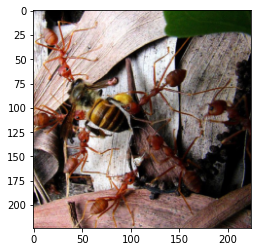

In [32]:
x, y = next(iter(train_dataset))

dim = x.shape[1]
print("Dimension of image:", x.shape, "\n",
        "Dimension of labels", y.shape)

plt.imshow(x[160].reshape(1, 3, 224, 224).squeeze().T.numpy())

In [33]:
class LR(nn.Module):
    def __init__(self, dim, lr=torch.scalar_tensor(0.01)):
        super(LR, self).__init__()
        self.w = torch.zeros(dim, 1, dtype=torch.float).to(device)
        self.b = torch.scalar_tensor(0).to(device)
        self.grads = {"dw":torch.zeros(dim, 1, dtype=torch.float).to(device),
                    "db":torch.scalar_tensor(0).to(device)}
        self.lr = lr.to(device)

    def forward(self, x):
        z = torch.mm(self.w.T, x) + self.b
        a = self.sigmoid(z)
        return a

    def sigmoid(self, z):
        return 1/(1+torch.exp(-z))

    def backward(self, x, yhat, y):
        self.grads['dw'] = (1/x.shape[1]) * torch.mm(x, (yhat-y).T)
        self.grads['db'] = (1/x.shape[1]) * torch.sum(yhat-y)

    def optimize(self):
        self.w = self.w - self.lr*self.grads['dw']
        self.b = self.b - self.lr*self.grads['db']


def loss(yhat, y):
    m = y.size()[1]
    return -(1/m)* torch.sum(y*torch.log(yhat) + (1-y)*torch.log(1-yhat))

def predict(yhat, y):
    y_prediction = torch.zeros(1, y.size()[1])
    for i in range(yhat.size()[1]):
        if yhat[0, i] <= 0.5:
            y_prediction[0, i] = 0
        else:
            y_prediction[0, i] = 1

    return 100 - torch.mean(torch.abs(y_prediction - y)) * 100


In [ ]:
x, y = next(iter(train_dataset))

x_flatten = x.T
y = y.unsqueeze(0)

dim = x_flatten.shape[0]

model = LR(dim)
model.to(device)
yhat = model.forward(x_flatten.to(device))
yhat = yhat.data.cpu()

cost = loss(yhat, y)
prediction = predict(yhat, y)
print("Cost : ",cost)

In [34]:
x, y = next(iter(train_dataset))

x_flatten = x.T
y = y.unsqueeze(0)

dim = x_flatten.shape[0]

model = LR(dim)
model.to(device)
yhat = model.forward(x_flatten.to(device))
yhat = yhat.data.cpu()

cost = loss(yhat, y)
prediction = predict(yhat, y)
print("Cost : ",cost)
print("Accuracy : ",prediction)

model.backward(x_flatten.to(device), yhat.to(device), y.to(device))
model.optimize()

Cost :  tensor(0.6931)
Accuracy :  tensor(50.4098)


In [36]:
costs = []
dim = x_flatten.shape[0]
learning_rate = torch.scalar_tensor(0.0001).to(device)
num_iterations = 100
lrmodel = LR(dim, learning_rate)
lrmodel.to(device)

def transform_data(x, y):
    x_flatten = x.T
    y = y.unsqueeze(0)
    return x_flatten, y

for i in range(num_iterations):
    x, y = next(iter(train_dataset))
    test_x, test_y = next(iter(test_dataset))
    x, y = transform_data(x, y)
    test_x, test_y = transform_data(test_x, test_y)

    yhat = lrmodel.forward(x. to(device))
    cost = loss(yhat.data.cpu(), y)
    train_pred = predict(yhat, y)

    lrmodel.backward(x.to(device),
                    yhat.to(device),
                    y.to(device))

    lrmodel.optimize()
    yhat_test = lrmodel.forward(test_x.to(device))
    test_pred = predict(yhat_test, test_y)

    if i % 10 == 0:
        costs.append(cost)
        print("Cost after iteration {}: {} | Train Acc : {} | Test Acc : {}".format(i, cost, train_pred, test_pred))

Cost after iteration 0: 0.6931472420692444 | Train Acc : 50.40983581542969 | Test Acc : 45.75163269042969
Cost after iteration 10: 0.6691464185714722 | Train Acc : 64.3442611694336 | Test Acc : 54.24836730957031
Cost after iteration 20: 0.6513172388076782 | Train Acc : 68.44261932373047 | Test Acc : 54.24836730957031
Cost after iteration 30: 0.6367813348770142 | Train Acc : 68.03278350830078 | Test Acc : 54.24836730957031
Cost after iteration 40: 0.6245325207710266 | Train Acc : 69.67213439941406 | Test Acc : 54.90196228027344
Cost after iteration 50: 0.6139212846755981 | Train Acc : 70.90164184570312 | Test Acc : 56.20914840698242
Cost after iteration 60: 0.6045223474502563 | Train Acc : 72.54098510742188 | Test Acc : 56.86274337768555
Cost after iteration 70: 0.5960499048233032 | Train Acc : 74.18032836914062 | Test Acc : 57.51633834838867
Cost after iteration 80: 0.5883073210716248 | Train Acc : 73.77049255371094 | Test Acc : 57.51633834838867
Cost after iteration 90: 0.581154584884

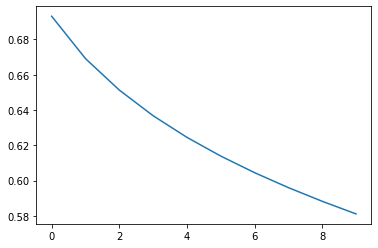

In [37]:
plt.plot(costs)
plt.show()